In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
import ashd

In [2]:
dwarfs = Table.read('../data/nearby-dwarfs.fits')
dwarfs.rename_column('_RAJ2000', 'ra')
dwarfs.rename_column('_DEJ2000', 'dec')
dwarfs = dwarfs.to_pandas()

In [3]:
cut = (dwarfs['R1']>3) & (dwarfs['R1']<50) 
dwarfs.loc[cut, ['Name', 'muV', 'R1']]

,Name,muV,R1
3,Segue (I),27.600000,4.400000
4,Ursa Major II,27.900000,16.000000
5,Bootes II,28.100000,4.200000
6,Segue II,27.400000,3.400000
8,Coma Berenices,27.299999,6.000000
12,Bootes (I),27.500000,12.600000
13,Draco,25.000000,10.000000
14,Ursa Minor,26.000000,8.200000
15,Sculptor,23.500000,11.300000
16,Sextans (I),27.100000,27.799999


pipeline 21 | 2017-08-24 12:28:31,342 |  | INFO: fetching image nearest to ra, dec = 168.3700, 22.1517
pipeline 41 | 2017-08-24 12:28:33,537 |  | INFO: smoothing image with ring filter with r_in = 4.0 and r_out = 5.0
pipeline 47 | 2017-08-24 12:28:35,402 |  | INFO: measuring and subtracting background
pipeline 50 | 2017-08-24 12:28:35,526 |  | INFO: detecting sources
pipeline 71 | 2017-08-24 12:28:38,963 |  | INFO: displaying sources with mpl


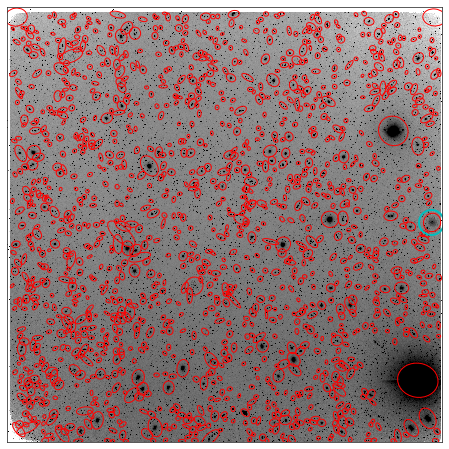

In [5]:
name = 'Leo II'
fetch = dwarfs['Name']==name
ra, dec = coords = dwarfs.loc[fetch, ['ra', 'dec']].values[0]
params = ashd.PipeParams()
pipe = ashd.ASHDPipe(ra, dec, params=params)
pipe.detect()
pipe.display_sources(plot_coord=True)